# Effective Graph for Arabidobis Thaliana

Several computation and plots of the effective graph for the Arabidobis Thaliana Boolean Model

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import math
import pandas as pd
import cana
from cana.networks.bio import THALIANA
import networkx as nx
import graphviz
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', **{'size':16})

## Effective Graph

In [3]:
T = THALIANA()
Tsg = T.get_structural_graph()

In [4]:
# Calculates Node position in a circle. Used to plot nodes always in the same position.
nodes = {d['label']:i for i,d in Tsg.nodes(data=True)}
pos = {}
for deg,name in zip(range(0,360,30), ['AG', 'AP3', 'PI', 'AP2', 'TFL1', 'FUL', 'AP1', 'FT', 'EMF1', 'LFY', 'SEP', 'WUS']):
    r = 160
    x, y = r*math.cos(math.radians(deg)), r*math.sin(math.radians(deg))
    pos[ nodes[name] ] = (x,y)
# Nodes not on the circle. Manually position them = UFO, LUG, CLF
for name,(x,y) in zip(['UFO','LUG','CLF'], [(200.,140.),(240.,50.),(240.,-50.)]):
    pos[ nodes[name] ] = (x,y)

Nodes: 15 | Edges: 46


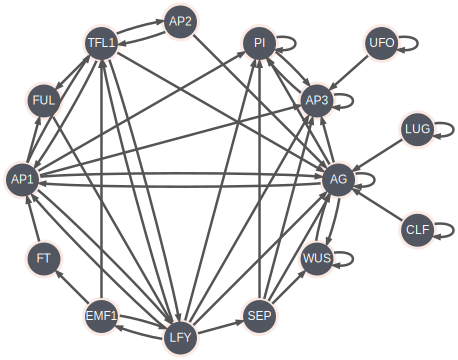

In [5]:
# Draw the Structural Graph
S = graphviz.Digraph(name='Structural Graph', engine='neato')
S.attr('graph', concentrate='false', simplify='false')
S.attr('node', shape='circle', fixedsize='true', width='.5', color='#fbeae4', style='filled', fillcolor='#515660', penwidth='3', fontname='Helvetica', fontcolor='white',fontsize='12')
S.attr('edge', arrowhead='normal', arrowsize='.5', color='#545454')

for node,d in Tsg.nodes(data=True):
    x,y = pos[node]
    xy = '%.1f,%.1f!' % (x/72,y/72)
    S.node(name=str(node), label=d['label'], pos=xy)

max_penwidth = 2.5
for s,t,d in Tsg.edges(data=True):
    weight = '%d' % (d['weight']*100)
    penwidth_scaled = '%.2f' % ( (d['weight']/1)*max_penwidth )
    S.edge(str(s),str(t), weight=weight, penwidth=penwidth_scaled, )
print 'Nodes: %d | Edges: %d' % (len(Tsg.nodes()) , len(Tsg.edges()) )
S #.render('thaliana-original',cleanup=True)

## Effective Graph

In [6]:
# Calculate Effective Graph
threshold = 0.01
Teg = T.get_effective_graph(mode='input',bound='upper', threshold=threshold)

Nodes: 15 | Edges: 41


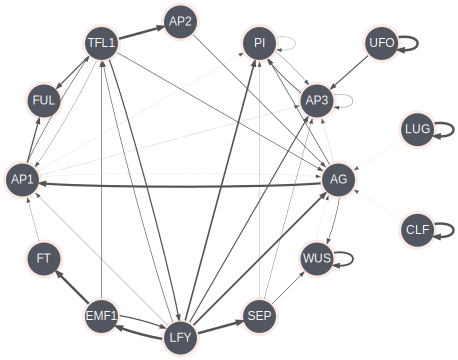

In [7]:
# Draw the Effective Graph
E = graphviz.Digraph(name='Effective Graph', engine='neato')
E.attr('graph', concentrate='false', simplify='false')
E.attr('node', shape='circle', fixedsize='true', width='.5', color='#fbeae4', style='filled', fillcolor='#515660', penwidth='3', fontname='Helvetica', fontcolor='white',fontsize='12')
E.attr('edge', arrowhead='normal', arrowsize='.5', color='#545454')

for node,d in Teg.nodes(data=True):
    x,y = pos[node]
    xy = '%.1f,%.1f!' % (x/72,y/72)
    E.node(name=str(node), label=d['label'], pos=xy)

max_penwidth = 2.5
for s,t,d in Teg.edges(data=True):
    weight = '%d' % (d['weight']*100)
    penwidth_scaled = '%.2f' % ( (d['weight']/1)*max_penwidth )
    E.edge(str(s),str(t), weight=weight, penwidth=penwidth_scaled)
print 'Nodes: %d | Edges: %d' % (len(Teg.nodes()) , len(Teg.edges()) )
E #.render('thaliana-effective',cleanup=True)

## Effective Connectivity Edge Weight Distribution

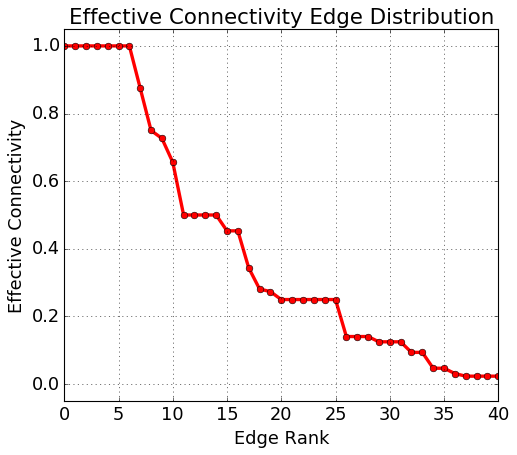

In [8]:
# Effective Connectivity Edge Weight Distribution (from returned edges after thresholding)
fig, ax = plt.subplots(1,1,figsize=(7,6))
ax.plot(sorted([d['weight'] for s,t,d in Teg.edges(data=True)], reverse=True), color='red',lw=3, marker='o', ms=6)
ax.grid()
ax.set_ylim(-0.05,1.05)
ax.set_title('Effective Connectivity Edge Distribution'); ax.set_ylabel('Effective Connectivity'); ax.set_xlabel('Edge Rank')

## Inspect certain nodes of the Effective Graph

In [9]:
print "In-edges to a certain node in the Effective Graph:"
nid = 9
for sid, tid, d in Teg.in_edges(nid, data=True):
    print '%s -> %s\t(weight: %s)' % (Teg.node[sid]['label'] , Teg.node[tid]['label'], d['weight'])

In-edges to a certain node in the Effective Graph:
AP1 -> AG	(weight: 0.0234375)
LFY -> AG	(weight: 0.7265625)
AP2 -> AG	(weight: 0.2734375)
WUS -> AG	(weight: 0.0234375)
LUG -> AG	(weight: 0.0234375)
CLF -> AG	(weight: 0.0234375)
TFL1 -> AG	(weight: 0.25)


In [10]:
print 'Edges that were removed in the Effectige Graph:'
diff = Tsg.copy()
diff.remove_edges_from([e for e in Teg.edges() if e in Tsg.edges()])
for sid,tid in diff.edges():
    print '%s -> %s' % (diff.node[sid]['label'] , diff.node[tid]['label'])

Edges that were removed in the Effectige Graph:
FUL -> LFY
AP1 -> LFY
AP2 -> TFL1
AG -> AG
SEP -> AG


# Inspect some of the nodes

In [11]:
print {i:node.name for i,node in enumerate(T.nodes)}
T.logic_dict[8]
# Exactr:
# UFU, EMF1, LFY, WUS, TFL1, (AP2 or AG)
# FVS
# AP3, UFO, LFY, WUS, AG, TFL1, PI (Não tem o EMF1)

{0: 'AP3', 1: 'UFO', 2: 'FUL', 3: 'FT', 4: 'AP1', 5: 'EMF1', 6: 'LFY', 7: 'AP2', 8: 'WUS', 9: 'AG', 10: 'LUG', 11: 'CLF', 12: 'TFL1', 13: 'PI', 14: 'SEP'}


AttributeError: BooleanNetwork instance has no attribute 'logic_dict'

# Plot Contralability Stuff
This was all computed by Alex

ORI = ['AP3', 'UFO', 'LFY', 'WUS', 'AG', 'TFL1', 'PI']
PIN = [['AP3', 'UFO', 'AP1', 'LFY', 'WUS', 'AG'], ['AP3', 'UFO', 'EMF1', 'WUS', 'AG', 'TFL1'], ['AP3', 'UFO', 'LFY', 'WUS', 'AG', 'TFL1']]


In [ ]:
# Draw the Effective Graph
E = graphviz.Digraph(name='Effective Graph', engine='neato')
E.attr('graph', concentrate='false', simplify='false')
E.attr('node', shape='circle', fixedsize='true', width='.5', color='#fbeae4', style='filled', fillcolor='#515660', penwidth='3', fontname='Helvetica', fontcolor='white',fontsize='12')
E.attr('edge', arrowhead='normal', arrowsize='.5', color='#545454')

for node,d in Teg.nodes(data=True):
    x,y = pos[node]
    xy = '%.1f,%.1f!' % (x/72,y/72)
    E.node(name=str(node), label=d['label'], pos=xy)

max_penwidth = 2.5
for s,t,d in Teg.edges(data=True):
    weight = '%d' % (d['weight']*100)
    penwidth_scaled = '%.2f' % ( (d['weight']/1)*max_penwidth )
    E.edge(str(s),str(t), weight=weight, penwidth=penwidth_scaled)
print 'Nodes: %d | Edges: %d' % (len(Teg.nodes()) , len(Teg.edges()) )
E #.render('thaliana-effective',cleanup=True)